<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split


In [ ]:
# Setup device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## 1. Create a straight line dataset


In [ ]:
# Create the data parameters
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature
X = torch.arange(start = 0.0, end = 1.0, step = 0.01).unsqueeze(dim = 1)
y = X * weight + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [ ]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

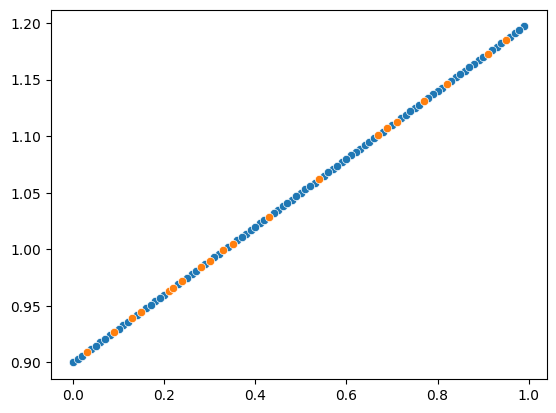

In [ ]:
# Plot the training and testing data
sns.scatterplot(x = X_train.numpy().flatten(), y = y_train.numpy().flatten() )
sns.scatterplot(x = X_test.numpy().flatten(), y = y_test.numpy().flatten())
plt.show()

## 2. Build a PyTorch model


In [ ]:
# Create PyTorch linear regression model by subclassing nn.Module

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(in_features = 1,
              out_features = 1)

  def forward(self, x):
    return self.layer(x)

In [ ]:
# Instantiate the model and put it to the target device
model = LinearRegression()
model.to(device)
model.state_dict()

OrderedDict([('layer.weight', tensor([[0.0377]], device='cuda:0')),
             ('layer.bias', tensor([0.1432], device='cuda:0'))])

## 3. Create a loss function and optimizer

In [ ]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

In [ ]:
# Training loop

# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model.train()

  # 1. Forward pass
  y_pred = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_train, y_pred)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      y_pred = model(X_train)
      # 2. Calculate test loss
      test_loss = loss_fn(y_train, y_pred)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.878 | Test loss: 0.865
Epoch: 20 | Train loss: 0.626 | Test loss: 0.613
Epoch: 40 | Train loss: 0.374 | Test loss: 0.362
Epoch: 60 | Train loss: 0.122 | Test loss: 0.110
Epoch: 80 | Train loss: 0.018 | Test loss: 0.018
Epoch: 100 | Train loss: 0.009 | Test loss: 0.008
Epoch: 120 | Train loss: 0.005 | Test loss: 0.007
Epoch: 140 | Train loss: 0.005 | Test loss: 0.007
Epoch: 160 | Train loss: 0.005 | Test loss: 0.007
Epoch: 180 | Train loss: 0.005 | Test loss: 0.007
Epoch: 200 | Train loss: 0.005 | Test loss: 0.007
Epoch: 220 | Train loss: 0.005 | Test loss: 0.007
Epoch: 240 | Train loss: 0.005 | Test loss: 0.007
Epoch: 260 | Train loss: 0.005 | Test loss: 0.007
Epoch: 280 | Train loss: 0.005 | Test loss: 0.007


## 4. Make predictions

In [ ]:
# Make predictions with the model
with torch.inference_mode():
  y_pred = model(X_test)

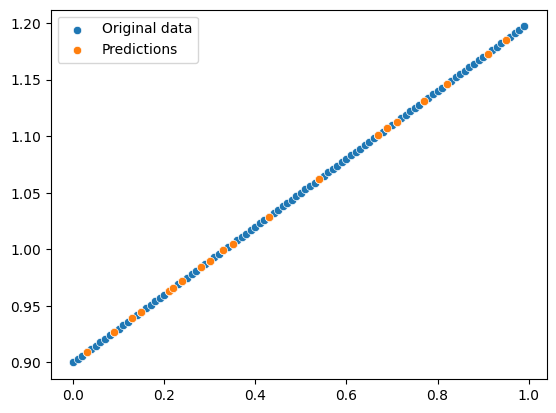

In [ ]:
# Plot the predictions (these may need to be on a specific device)
sns.scatterplot(x = X.cpu().numpy().flatten(), y = y.cpu().numpy().flatten(), label = 'Original data' )
sns.scatterplot(x = X_test.cpu().numpy().flatten(), y = y_test.cpu().numpy().flatten(), label = 'Predictions')
plt.legend()
plt.show()

## 5. Save trained model's `state_dict()` to file.


In [ ]:
!ls

sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path

# 1. Create models directory
PATH = '/content/drive/MyDrive/PyTorch_projects/Exercises/01_pytorch_workflow_exercises_saved_model.pyt'

# 2. Save the model state dict
torch.save(obj = model.state_dict(), f = PATH)


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
# Make predictions with loaded model and compare them to the previous
with torch.inference_mode():
  y_pred_2 = loaded_model(X_test.cpu())

y_pred_2 == y_pred.cpu()

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])